# 1. EDA

In [ ]:
import pandas as pd

In [ ]:
perch = pd.read_csv("/content/drive/MyDrive/30619 장우준 인공지능/dataset/perch단순회귀.csv")

In [ ]:
perch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56 entries, 0 to 55
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Species   56 non-null     object 
 1   Weight    56 non-null     float64
 2   Length    56 non-null     float64
 3   Diagonal  56 non-null     float64
 4   Height    56 non-null     float64
 5   Width     56 non-null     float64
dtypes: float64(5), object(1)
memory usage: 2.8+ KB


In [ ]:
perch.head()

,Species,Weight,Length,Diagonal,Height,Width
0,Perch,5.9,8.4,8.8,2.1120,1.4080
1,Perch,32.0,13.7,14.7,3.5280,1.9992
2,Perch,40.0,15.0,16.0,3.8240,2.4320
3,Perch,51.5,16.2,17.2,4.5924,2.6316
4,Perch,70.0,17.4,18.5,4.5880,2.9415


In [ ]:
perch.describe()

,Weight,Length,Diagonal,Height,Width
count,56.000000,56.000000,56.000000,56.000000,56.000000
mean,382.239286,27.892857,29.571429,7.861870,4.745723
std,347.617717,9.021668,9.529509,2.878177,1.774626
min,5.900000,8.400000,8.800000,2.112000,1.408000
25%,120.000000,21.825000,23.325000,5.692500,3.525000
50%,207.500000,25.300000,26.750000,6.921800,4.154900
75%,692.500000,36.625000,39.075000,10.846500,6.448125
max,1100.000000,44.000000,46.600000,12.800200,8.142000


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

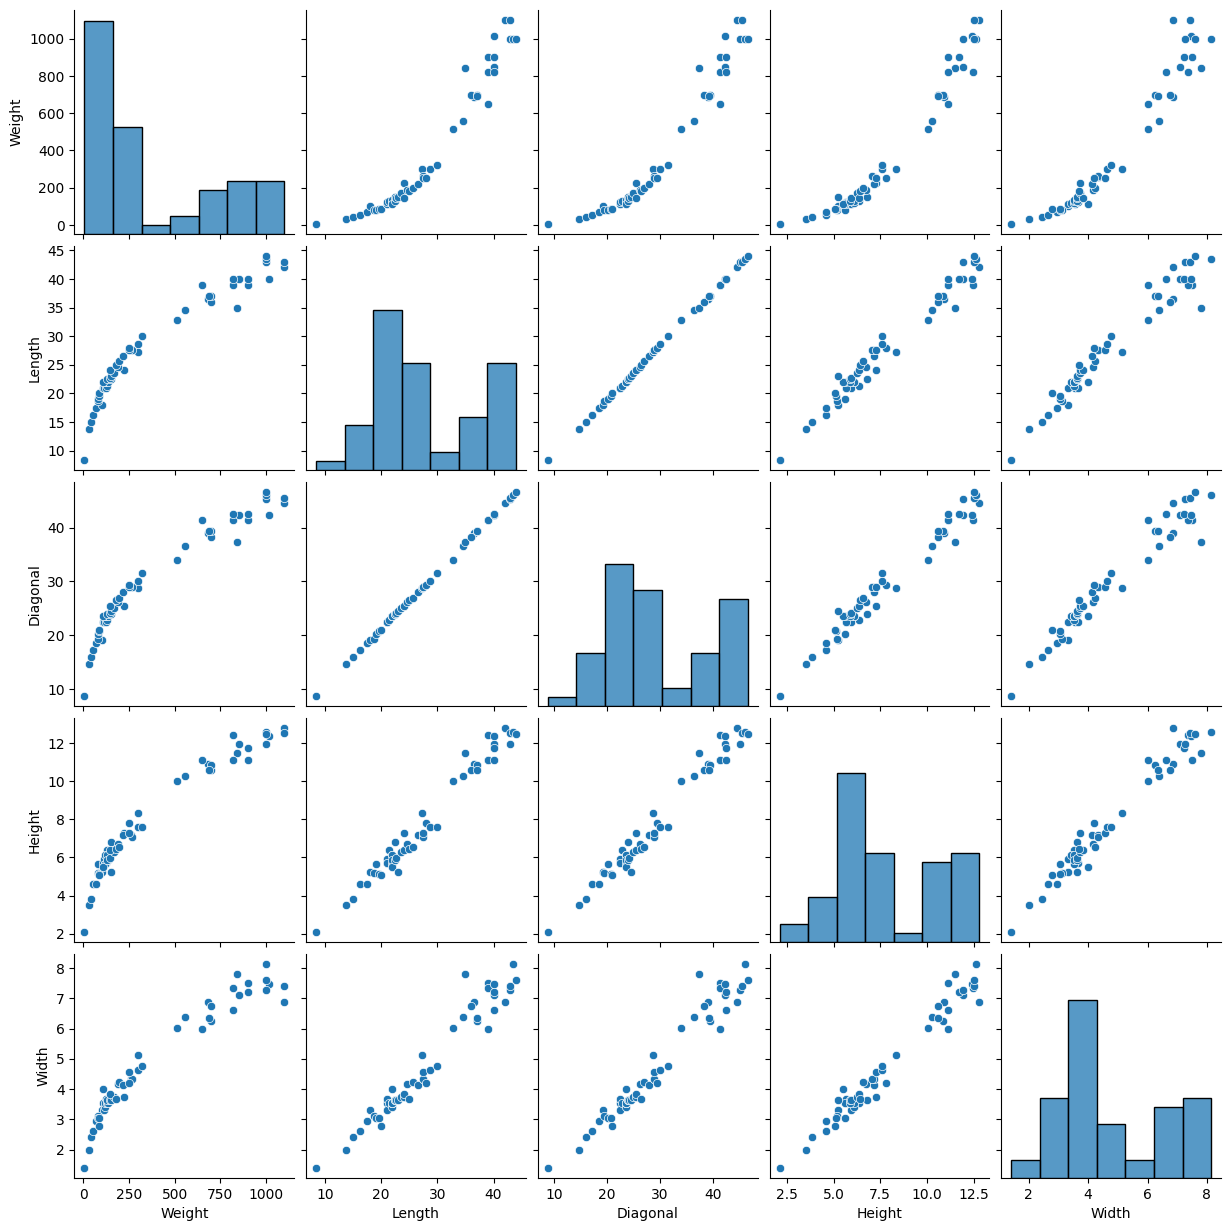

In [ ]:
sns.pairplot(perch)

In [ ]:
corr = perch.corr(numeric_only=True)
corr

,Weight,Length,Diagonal,Height,Width
Weight,1.000000,0.958656,0.959506,0.968441,0.963943
Length,0.958656,1.000000,0.999779,0.985584,0.974617
Diagonal,0.959506,0.999779,1.000000,0.985909,0.975131
Height,0.968441,0.985584,0.985909,1.000000,0.982943
Width,0.963943,0.974617,0.975131,0.982943,1.000000


<Axes: >

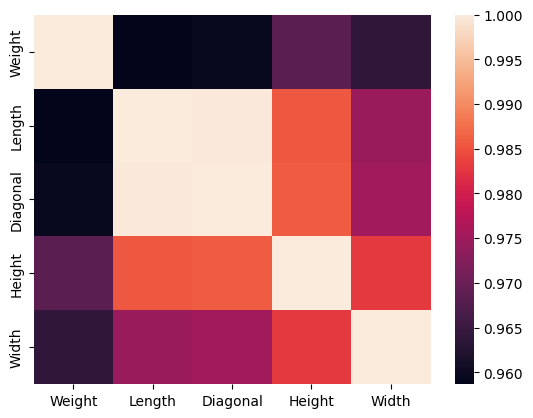

In [ ]:
sns.heatmap(corr)

# 2. ㅇds

In [ ]:
from sklearn.model_selection import train_test_split

X = perch.drop(["Weight", "Species"], axis = 1)
y = perch["Weight"]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()

X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.fit_transform(X_test)

# 3. 머신러닝

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knr = KNeighborsRegressor(n_neighbors=5)
knr.fit(X_train_scaled, y_train)

print(f"knr train score = {knr.score(X_train_scaled, y_train)}")
print(f"knr test score = {knr.score(X_test_scaled, y_test)}")

knr train score = 0.9863718050860306
knr test score = 0.9420855089088324


In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)

print(f"lr train score = {lr.score(X_train, y_train)}")
print(f"lr test score = {lr.score(X_test, y_test)}")

print(f"기울기 = {lr.coef_} 절편 = {lr.intercept_}")

lr train score = 0.9360968117074965
lr test score = 0.9510445445003516
기울기 = [-65.48934354  68.14915623  76.63683168  28.33924939] 절편 = -540.0243555731021


In [ ]:
from sklearn.tree import DecisionTreeRegressor, plot_tree

dtr = DecisionTreeRegressor(max_depth=3, min_samples_leaf=3, min_samples_split=4)
dtr.fit(X_train, y_train)

print(f"dtr train score = {dtr.score(X_train, y_train)}")
print(f"dtr test score = {dtr.score(X_test, y_test)}")
print(f"max depth = {dtr.get_depth()}")

dtr train score = 0.9871866548535626
dtr test score = 0.9539107206421052
max depth = 3


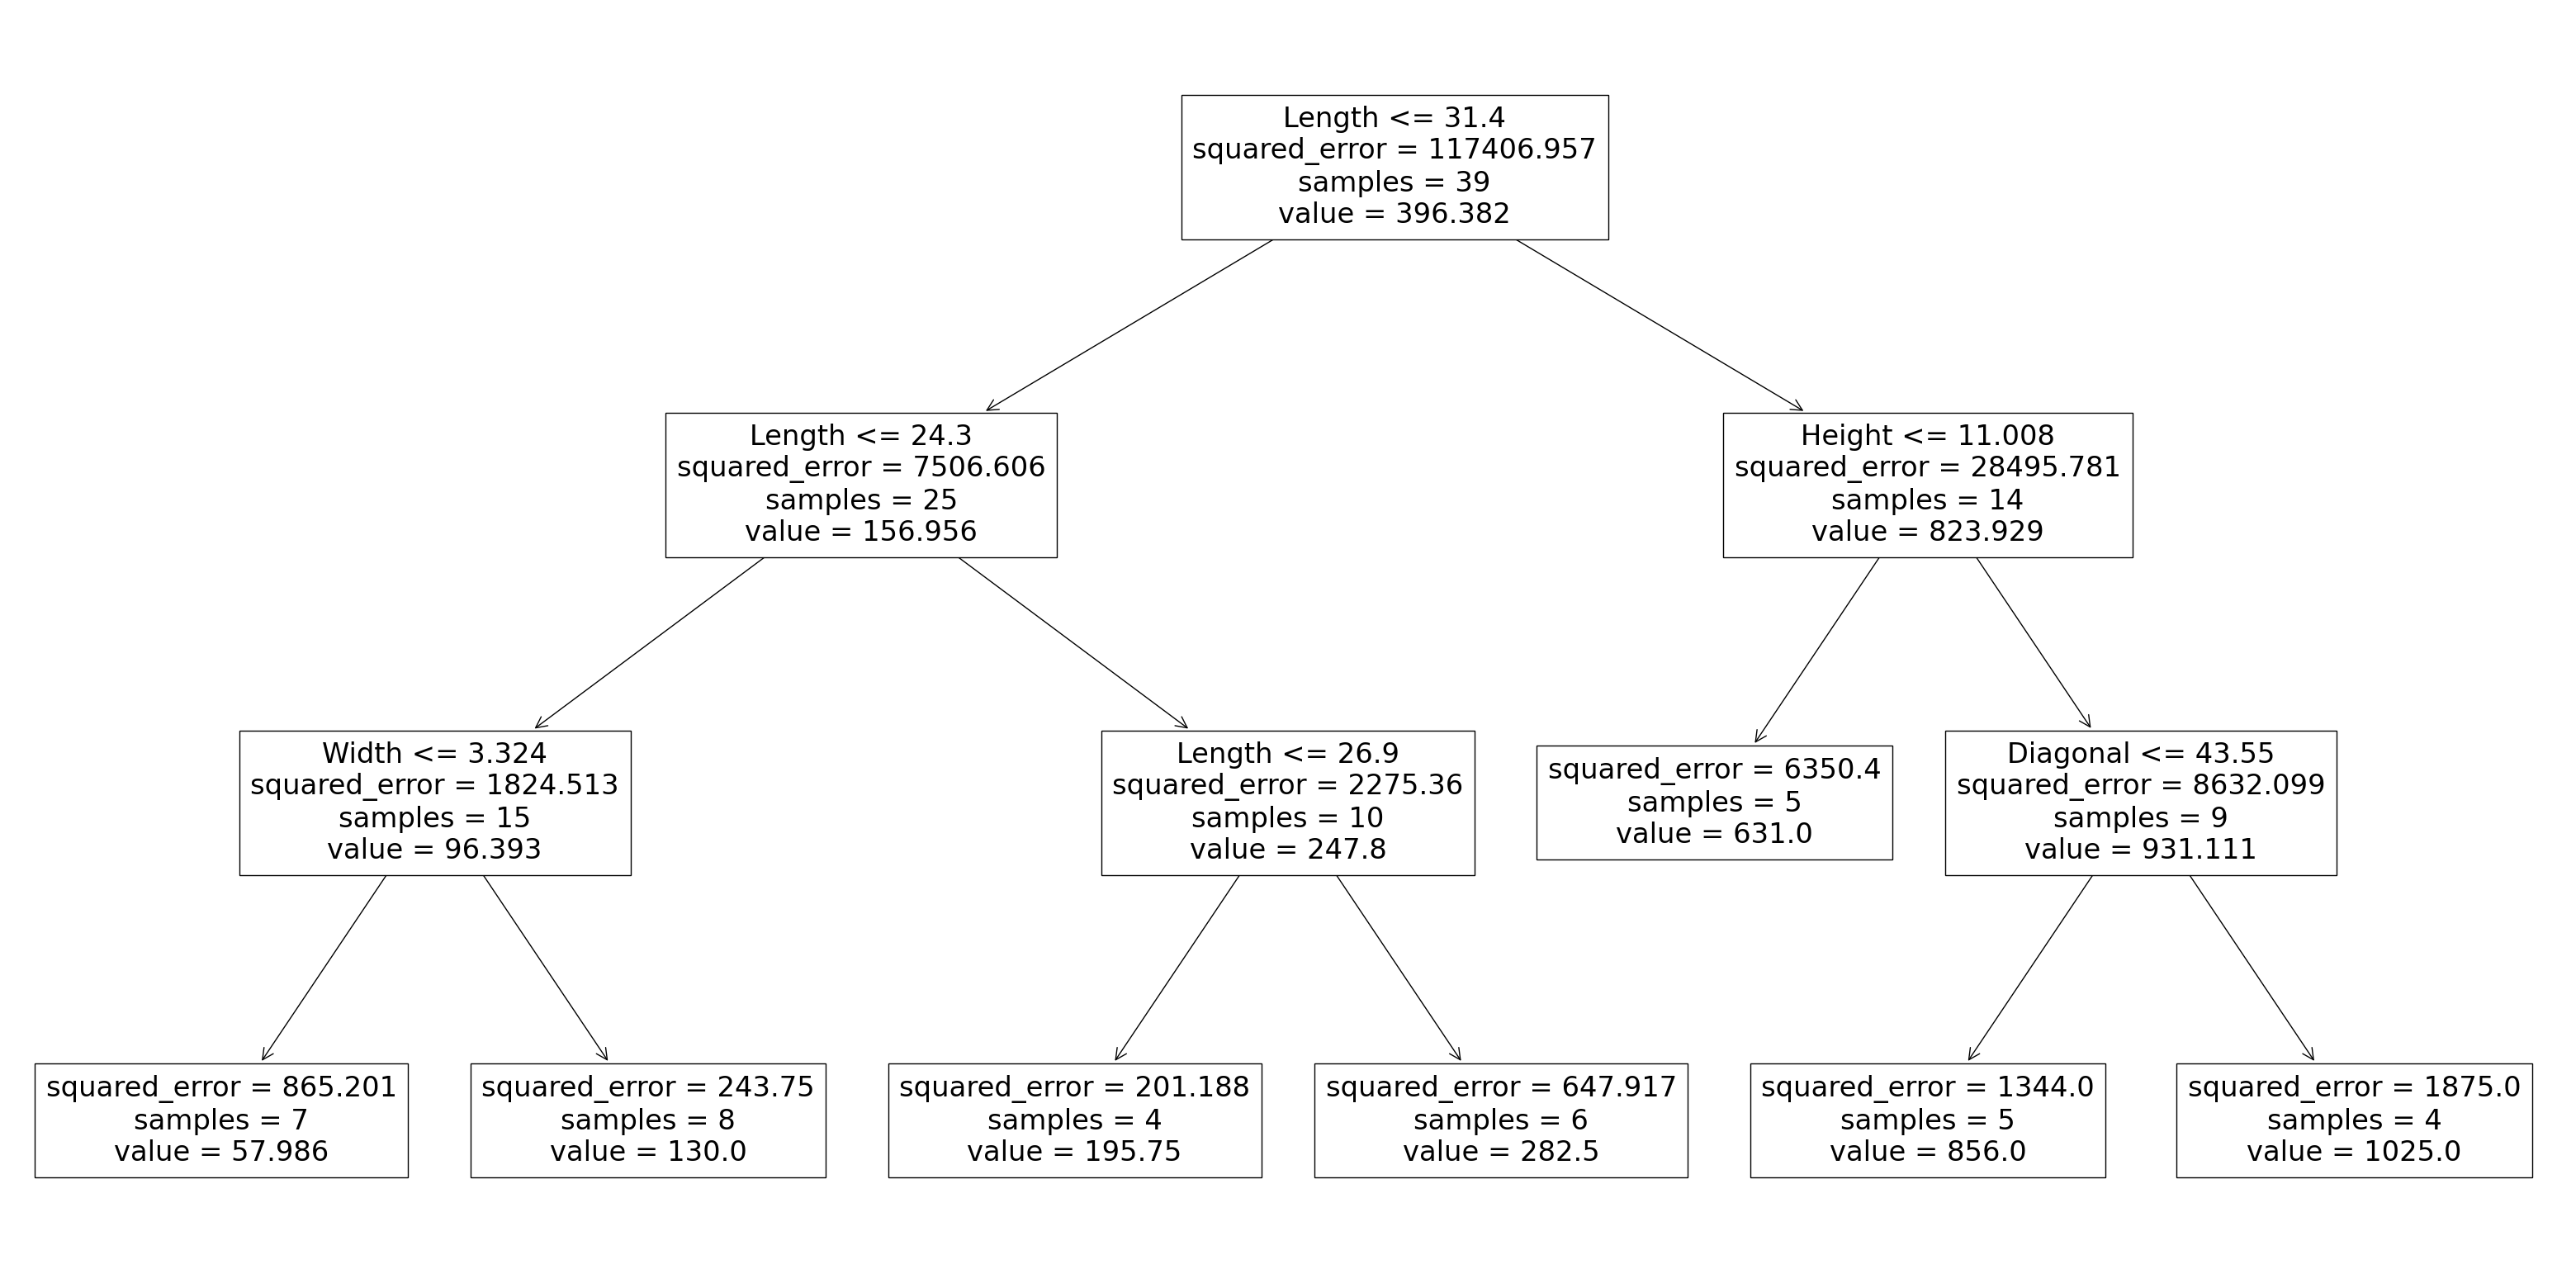

In [ ]:
plt.figure(figsize=(40, 20))
plot_tree(dtr, feature_names=X.columns)
plt.show()

특성 중요도 = [0.91762972 0.01404117 0.06404584 0.00428328]
특성 목록 = Index(['Length', 'Diagonal', 'Height', 'Width'], dtype='object')


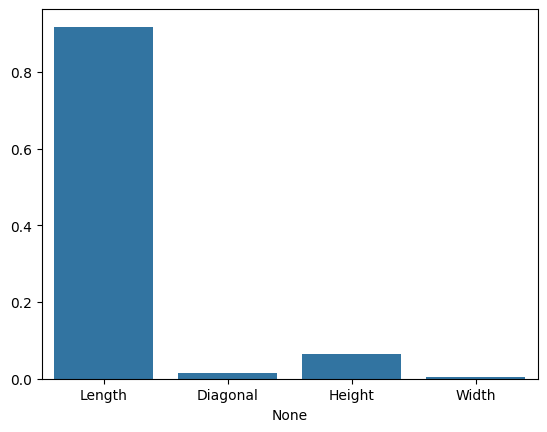

In [ ]:
print(f"특성 중요도 = {dtr.feature_importances_}")
print(f"특성 목록 = {X.columns}")

sns.barplot(x=X.columns, y=dtr.feature_importances_)
plt.show()

# 4. 공통

In [83]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error, r2_score
import numpy as np

knr_pred = knr.predict(X_test_scaled)

print(f"MAE = {mean_absolute_error(y_test, knr_pred)}")
print(f"MSE = {mean_squared_error(y_test, knr_pred)}")
print(f"MAPE = {mean_absolute_percentage_error(y_test, knr_pred)}")
print(f"RMSE = {np.sqrt(mean_squared_error(y_test, knr_pred))}")
print(f"r2_score = {r2_score(y_test, knr_pred)}")

MAE = 50.55882352941177
MSE = 6954.939411764706
MAPE = 0.15696687400727696
RMSE = 83.39627936403822
r2_score = 0.9420855089088324


In [ ]:
from sklearn.model_selection import GridSearchCV
params = {
    "max_depth": [3, 4, 5, 6],
    "min_samples_split": [5, 6, 7, 8],
    "min_samples_leaf": [5, 6, 7, 8],
}
gs = GridSearchCV(DecisionTreeRegressor(), params)
gs.fit(X_train, y_train)

print(f"최고의 하이퍼 파라미터 = {gs.best_params_}")
print(f"최고의 예측 정확도 = {gs.best_score_}")

최고의 하이퍼 파라미터 = {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 8}
최고의 예측 정확도 = 0.9420597288328327


In [ ]:
dtr_final = gs.best_estimator_

print(f"DTR final train score = {dtr_final.score(X_train, y_train)}")
print(f"DTR final test score = {dtr_final.score(X_test, y_test)}")

DTR final train score = 0.971506843408437
DTR final test score = 0.9320915612103329


Text(0, 0.5, 'residual')

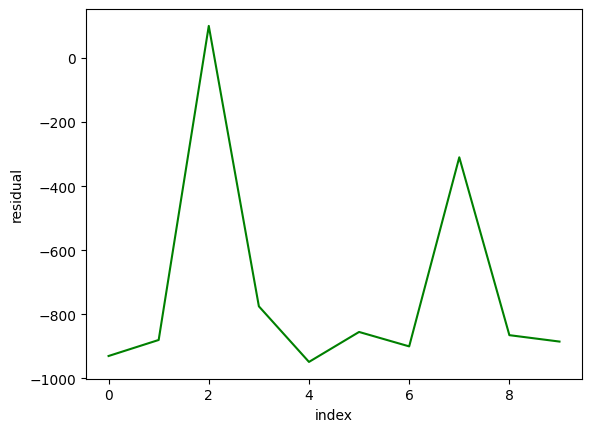

In [ ]:
n_samples = 10
error = y_test - knr_pred

plt.plot(range(n_samples), error[:n_samples], c="g")
plt.xlabel("index")
plt.ylabel("residual")

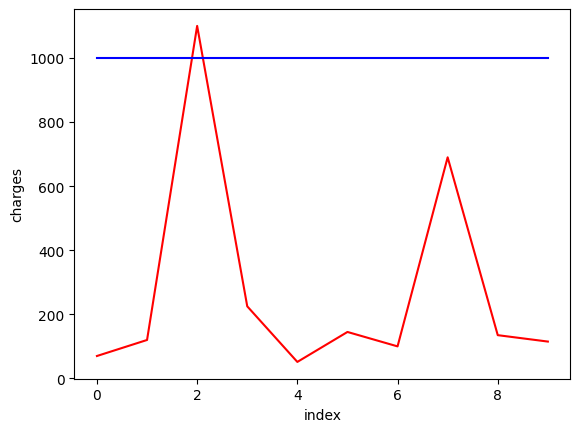

In [ ]:
n_samples = 10
plt.plot(range(n_samples), y_test[:n_samples], c="r") # 실제 값
plt.plot(range(n_samples), knr_pred[:n_samples], c="b") # 예측 값
plt.xlabel("index")
plt.ylabel("charges")
plt.show()